Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam # type: ignore


Data PreProcessing


Training image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'D:\Python\Projects\Fruits and vegetable prediction system\Edible Dataset\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=42,  # Optional, ensures reproducibility
    validation_split=0.2,  # 20% validation split
    subset="training",  # Specify this as 'training'
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.
Using 2492 files for training.


Validation image pre-processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'D:\Python\Projects\Fruits and vegetable prediction system\Edible Dataset\validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=42,  # Same seed ensures consistent shuffling
    validation_split=0.2,  # 20% validation split
    subset="validation",  # Specify this as 'validation'
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.
Using 70 files for validation.


Model Building

In [4]:
cnn = tf.keras.models.Sequential()


BUilding Convulation Layer

In [5]:
# 1st conulation layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [6]:
# Dropout to prevent overfitting
cnn.add(tf.keras.layers.Dropout(0.25))


In [7]:
# 2nd Convolutional Layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
# Dropout to prevent overfitting
cnn.add(tf.keras.layers.Dropout(0.25))

In [9]:
# Flattening Layer
cnn.add(tf.keras.layers.Flatten())

In [10]:
# Fully Connected Layers 
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

# Dropout to prevent overfitting
cnn.add(tf.keras.layers.Dropout(0.5))

# Output Layer 
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))

# Model Summary
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Recompiling the model 
cnn.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']  
)

Evaluating the model

In [13]:
# Train the model
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=32)

Epoch 1/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 27s 318ms/step - accuracy: 0.0308 - loss: 16.5465 - val_accuracy: 0.0429 - val_loss: 3.5040
Epoch 2/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 28s 353ms/step - accuracy: 0.0522 - loss: 3.5349 - val_accuracy: 0.0857 - val_loss: 3.3570
Epoch 3/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 23s 291ms/step - accuracy: 0.0648 - loss: 3.4294 - val_accuracy: 0.0571 - val_loss: 3.2471
Epoch 4/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 25s 313ms/step - accuracy: 0.0721 - loss: 3.3261 - val_accuracy: 0.1143 - val_loss: 3.0515
Epoch 5/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 29s 367ms/step - accuracy: 0.1092 - loss: 3.1821 - val_accuracy: 0.1143 - val_loss: 2.8846
Epoch 6/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 29s 363ms/step - accuracy: 0.1317 - loss: 3.0805 - val_accuracy: 0.1286 - val_loss: 2.8685
Epoch 7/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 40s 505ms/step - accuracy: 0.1325 - loss: 3.0096 - val_accuracy: 0.2429 - val_loss: 2.6641
Epoch 8/32
78/78 ━━━━━━━━━━━━━━━━━━━━ 38s 474ms/step - accuracy: 0.1588 - loss: 2.9274 - val_acc

Saving the trained model

In [14]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)
     

78/78 ━━━━━━━━━━━━━━━━━━━━ 14s 182ms/step - accuracy: 0.9640 - loss: 0.1223
Training accuracy: 0.9642857313156128


In [15]:

#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8433 - loss: 0.7537
Validation accuracy: 0.8428571224212646


Training visualization

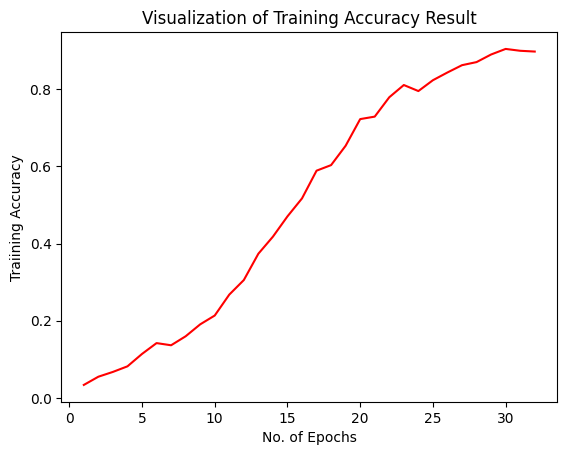

In [17]:

epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

Validation Accuracy

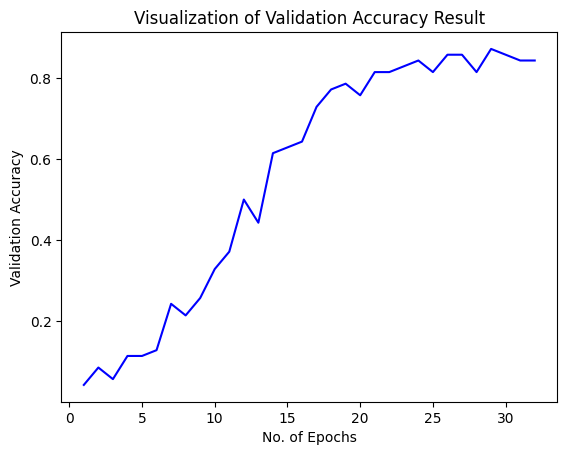

In [18]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

Test Set Evaluation

In [19]:

test_set = tf.keras.utils.image_dataset_from_directory(
    r'D:\Python\Projects\Fruits and vegetable prediction system\Edible Dataset\test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
  

Found 359 files belonging to 36 classes.


In [20]:

test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 252ms/step - accuracy: 0.8747 - loss: 0.7999
Test accuracy: 0.8662952780723572


Saving Model


In [21]:

cnn.save('trained_mode_version1.h5')

In [22]:
training_history.history

{'accuracy': [0.033707864582538605,
  0.05497592315077782,
  0.06741572916507721,
  0.0818619579076767,
  0.11396468430757523,
  0.14205457270145416,
  0.1364365965127945,
  0.1597110778093338,
  0.19060994684696198,
  0.21348313987255096,
  0.26765650510787964,
  0.30537721514701843,
  0.3735955059528351,
  0.4177367687225342,
  0.4703049659729004,
  0.516853928565979,
  0.5886837840080261,
  0.603130042552948,
  0.6532905101776123,
  0.7223113775253296,
  0.7287319302558899,
  0.778892457485199,
  0.8105939030647278,
  0.7949438095092773,
  0.8230336904525757,
  0.8430979251861572,
  0.8619582653045654,
  0.869983971118927,
  0.8896468877792358,
  0.9040930867195129,
  0.8992776870727539,
  0.8972712755203247],
 'loss': [7.015771389007568,
  3.5195508003234863,
  3.4122493267059326,
  3.2987282276153564,
  3.16491436958313,
  3.0600030422210693,
  2.97930645942688,
  2.919233798980713,
  2.8009402751922607,
  2.700857162475586,
  2.5220093727111816,
  2.386272430419922,
  2.133418798

In [23]:

#Recording History in json
import json
with open('training_history.json','w') as f:
  json.dump(training_history.history,f)